
So notebooks with vispy on top of webGL looks like a great solution.
We need to be able to demonstrate:
* authentication (no access to other people's data)
* handling of large dataset (we are moving towards HDF5)
* viewing slices (1, 2 or 3D) of datasets of high dimensionality (4,5D)
* scripting capability (remotely)


Jupyter & IPython, A tool for scientific workflow.

The Jupyter/IPython Project and it particular one of the frontend known as the notebook is the perfect polyglot tool for scientific computation workflows. The next stable version of the tools will enable for the first time real multi-user usage and in perfect for data analysis on large remote dataset and interactive exploration with a single installation on a lab cluster.

I will show some of the current features of the Jupyter/IPython notebook (multilanguage, rich representation, interactive widgets...) as well as demonstrate the current state of the multi-user integration and architecture. Discuss the curent and futur state of authentication, data sharing model, scalability. 

I'll also discuss the future developement plan and projected feature like real-time colaboration on documents (like google doc/and google drive integgration), evolution of notebook format to integrate better with publishers.



# Jupyter/IPython

## A multi-language architecture for interactive computing

## ESRF- November, 24 2014

###### Bussonnier Matthias

## About Me:

 - A physicit
 - (PhD in BioPhysics)
 - Invoved in IPython/Jupyter for ~3 years now, 
 - PostDoc in UC Berkley at [Berkeley Institute for Data Science](http://bids.berkeley.edu).
     - Work on Software to improve Scientific Workflow.
     - Add Realtime and GDrive integration to notebook

### Quick survey

  - who uses Jupyter/IPython
  - who know vaguely what Jupyter/IPython
  - who does not have a clue

## What is Jupyter/IPython

IPython is a set of tool to go from individual exploratory work to production-scale execution and publication.

<p class='alert alert-warning' style='font-size:120%'>
    What I show here is less than 24 hours old, so expect bugs and change in final version of released software. 
    **Backup** your data if you try.
</p>

Everything is 
 - on github https://github.com/jupyter and https://github.com/IPython  (for latest dev version)
 - BSD And Free

If you want to try now:
 - tmpnb.org (you can play with live version)
 - nbviewer.org (see what people are doing)
 - https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks
 

## The team

- UC Berkeley/Cal Poly (full time) 
    - Fernando Perez
    - Brian Granger
    - Min Ragan Kelley
    - Thoma Kluyver
    - Jonathan Frederic 
    - & Me 
   

# Current IPython funding
<img src="fig/Logo_Google.png" width=20%></img>
<img src="fig/sloan-logo.png" width=20%></img>
<img src="fig/rackspace-logo.png" width="20%"></img>
<img src="fig/microsoft-logo.png" width=20%></img>
<img src="fig/simons-logo.png" width=20%></img>
<img src="fig/nsf-logo.png" width=10%></img>



### A bit of history

<div class="slide-header">From a better shell...</div>
### 2001, Fernando Pérez, instead of a Physics dissertation
<center>
<img src="files/fig/ipython_console4.png" width="80%">

https://gist.github.com/fperez/1579699
</center>

<div class="slide-header">... to a fancier shell (and a protocol!)...</div>
## 2010, E Patterson, Enthought

<center>
<img src="files/fig/ipython_qtconsole.png" width="40%">
</center>

<div class="slide-header">As well as 6 notebook attempts in 6 years...</div>
## T. Matev, T. Alatalo, R. Kern, Min RK, J. Gao, B. Granger
<center>
<img src="files/fig/ipython-http.png" width="70%">
</center>

# Not Python only

> “Why is it called IPython, if it can do Julia, R, Haskell, Ruby, ... ?”

And much more.

**IJulia**, **IHaskell**, IFSharp, IRuby, IGo, IScala, IMathics, IAldor, **Calico Project**, Lua Kernel, IRKernel, IErlang, IOCaml, IForth, IPerl, IOctave, IScilab, ICSharp, Bash, Clojure Kernel, Hy Kernel

### Jupyter

Everything which is language agnostic
    
  - Network protocol for interactive computing
  - Clients for protocol
    - Console
    - Qt Console – Notebook
  - Notebook file format & tools (nbconvert...)
  - Nbviewer...

### IPython

- Written in Python
- Supercharged Python Shell
    - "Magics", `?/??`
    - **some** cross language integration
    - rich display protocol
- Some Tools for parallel computing
- ment to become only one kernel that can be used with jupyter.

## A quick introduction to Jupyter Notebook

The Notebook is a web-based interface that allows Interactive code editting and code edditing and execution as webb as inclusion of full paragraph of text and rich math. Example with Python:

In [4]:
location = 'ESRF'
print('Hello', location)

Hello ESRF


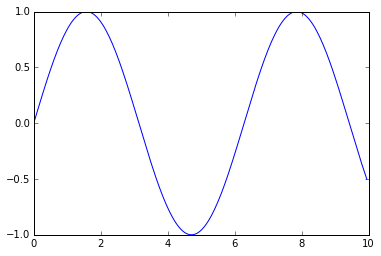

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def pl(ω=1.0):
    x = np.arange(0,10,0.05)
    plt.plot(x, np.sin(ω*x))
    
pl()

In [14]:
from IPython.html.widgets import interact

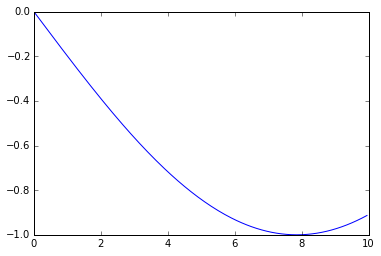

In [15]:
interact(pl)

### Other rich representation

In [16]:
from IPython.display import display

from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')

from __future__ import division
import sympy as sym
from sympy import *
x, y, z = symbols("x y z")
f, g, h = map(Function, 'fgh')

In [17]:
Rational(3,2)*pi + exp(I*h(x)) / (g(x)**2 + f(y))

         ⅈ⋅h(x)   
3⋅π     ℯ         
─── + ────────────
 2            2   
      f(y) + g (x)

## A taste of interactivity

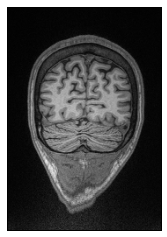

In [18]:
# adapted from a Scott Burns' example.
import matplotlib
matplotlib.rc('figure', figsize=(8,6))
%matplotlib inline

from brain_viewer import viewer

brain = 'MPRAGE.nii.gz' # this is a T1 image of Scott brain
viewer(brain)

## 3D visualisation

3D Visualisation is possible in the notebook using WebGL/[VisPy](./webgl_example_1.ipynb).

VisPy Code Camp at ESRF [last Feb](http://cyrille.rossant.net/back-from-our-first-vispy-code-camp-at-esrf/)

[Example]([VisPy](./webgl_example_1.ipynb)

## Multilanguage

2 types of multi language which are radically differents

- Native Kernel 
    - Python,
    - [Julia](http://localhost:8888/tree/talks/Julia-EuroSciPy14)
    - Haskell,
    - OCaml
    - ,...15+)
    
- Kernel specific binding
    - IPython [magics](Interactive%20Fortran.ipynb)
    - Julia PyCall, ccall...

# Sharing

### nbconvert

Nbconvert is a library which allow conversion from .ipynb to html, latex, pdf, rst, py .... (etc).
it is availlable 'as a service' on [nbviwer.org](http://nbviewer.org) with tight integration into github.


## Interactivity in static view

- http://nbviewer.ipython.org/url/jakevdp.github.com/downloads/notebooks/mpld3Demo.ipynb

# Architecture and Multi Users

Architecture of the notebook

![img](notebook_components.png)

- Each box can be on a different machine
- Each Box can be containerized
- The notion of what is where can be confusing for end-user.
- Recent technology do not work on  all networks :
    - 3 ØMQ and 3 websockets sockets/kernel (file desccriptor limit) 
    - websocket IE ≥ 10

## Multi User

Work in progress usable/used now
  - Even more recent tech (nodejs)
  - Slightly in flux
  - still limitted doc
  - MVP
  
Frontend capable of spawning Single User servers and redirect to it.
  - Unix permission
  - Unix Login
  - Only spawn SU on local machine.
  
Each piece can be replaced, 
  - Comunity prototype of OAuth login
  - Comunity prototype of Docker Spawner
  
Used now:
  - tmpnb.org
  - [nature demo](http://www.nature.com/news/interactive-notebooks-sharing-the-code-1.16261)
  - bryn mawr college [CS teaching](http://jupyter.cs.brynmawr.edu/hub/dblank/public)

<img src='fig/arch.png'  width='100%'/>

## Future

- in browser terminal
- in browser editor 
- real-time colaboration
- static widgets


Questions

- What about security ? 
    
    In the multi user server, each component can be isolated/put in VM. Docker was mentionned. 
    Docker does not directly provide security, but can help with it. 
    
    The 'hub' and the single-user wrapper insure that you are the only one that have access to the server, so you are the only one that should get access to your own computation kernel (as with traditional script) 
    
    With a web base notebook there is also the risk of cross script scripting and all web-based attack. We deal with that by cryptographycally signing the notebooks to be sure that users were the last to modify a notebook. Thus any notebook that does not appear as correctly signed will not display potentially unsafe content. THe owner of the notebook does not see the effect of the signature and thus get dynamic (javascript) content as soon as he/she open the notebook. 
    
    The multiuser server can be runeed as a single unpriviliedged user that can spawn single)user server only which limit its attack area in case of program beeing compromised. 
    The auth token and alike credential are passed as environement variable (whitelisted) so no user with shell access to the machine can get credential.
    
    The "sharing" of data is the traditional unix model, if you `chmod g+r` I can comme into your home and read your notebook, and can execute them (if data is readable to me) but cannot modify. 
    if `chmod g+w`I can also write the notebook, but the cryptographic signature still insure I cannot execute malicious code as you when you open them later. 
    
 

   
- What about this dynamic plotting library that was not matplotlib but alike. 

   It's mpld3 by Jake Van Der Plas,it's a wrapper around matplotlib that convert matplotlib figure into javascript-y thing where you can pan and zoom. An alternative is Continuum.io bokeh. 
   I'm not completly solve on bokeh that have a custom backend that use a custom redis server to do remote data sampling. 
   

   
- QtConsole Future vs Notebook.

    Qtconsole code is a mess. A QtRichTextWidget which is at the base of the implementation does not render recent HTML and is deadly slow if one use javascript. The QtConsole will be splitted in a separate project, and is looking for a maintainer. A better approach would be to reimplement a QtConsole-like frontend that uses a QtWebkitView/ChromeEmbeded structure. It would support much richer medi, youtube video, latex, GoogleMap-like widget, and could be integrated in a rich client.
    
 

   
- Multilanguage integration Fortran/C/Cython/C++ in one kernel
    Only the Python kernel do that for the time beeing. in uses some magic to compile on the fly the module with a random name and import it under an alias, it uses hash to ensure the module is recompiled each time. It is a nice trick that work well for interactivity, though languages lke C/Fortran are not made to be interactively used, you will have difficulty to chage the fact. 
    
    Julia have something built in into the language that works well, using standard libray module ccall, or the PyCall package you can natively call into C or python. The fundation of the language are currently modifid to allow the same with C++. As it can call C, it can of course call fortran. A package also allow to call into Java directly. Python is a special case as the `julia` python package can allow the python interpreter to call dirrectly julia. it is though possible to define (as an example) Fibonacci in Julia and in python that call Fib(N-1) of the same language and Fib(n-2) of the other. If you set Fib(1) to raise, the stacktrace will be a layercake of Python and Julia. (which is kinda awesome)

    
- Julia seem awesome. 
  That not a question, but yes it is. It's almost as simpel as python an can reach Fortran-like performences. example of :
  
```julia
function bar()
    k=2
    for i=1:10
        k=k-2*i+k^2
    end
    return k
end
code_native(bar,())
```

That compile as only 1 assembly instruction as the compile is smart enough to solve this at compile time. Homoiconicity and Macro allow extensive code generation and compile time logic that make it sometime faster than fortran. (Example of Leap-Second date-time library that flatten the binary search tree at compile time). Extensive use of Unicode for compact notation, `\theta<tab>`quive ou theta, `\cup` will give you the union symbol which for example  allow to work with sets as you would on paper.  Lots of infix operator are paresd but not defined, which is nice for custom code that woudl be easier to write with custom infix operator, like \oplus, \otimes for convoltion, and so on and so forth. The kernel in one of the other kernel that support rich representaiont and have it baked in the language, which allow to run julia on cluster with the overhead the IPython have with the Python kernel. THough the language is still young and the syntax still in motion. So you need to like recompiling every few day or so and be kept informed of the changes. Though it is really promising IMHO. 
    

- 3D visualisation & vispy, Re. 
    Both vispy and IPython are on heavy developpement, so it is still hard to get bleeding edge IPython and bleeding-edg Vispy and have the 2 working (but it can work, we saw one exmaple). Show one related demo that use a Leap-Motion (Microsoft kinect like device) that show that you can see in realtime a 3D representaion of your hand in the browser (coudl be used to manipulate data). 
    About amount of data this could handle, it depends on the reduction step you do in the kernel. Once you have your 3d data points, up to what can fit in local computer graphic card memeory, you can have 60 FPS in browser rendering. As a non 3D example, one can easly treat a cartographic datased of all the refused/accepted loan in the US and draw the percentage of aceptance of each county in US. The Dataset is several Gigabytes in the kernel. Only local density is send to the browser and map tiling is streamed as needed so as long as the Cluster can process the data fast enough, the map will be smooth in the notebook. 
    

   
- vispy/3D 3 round: How do we define a 3D reprensentation of an object in python. 

  Exmaple of html: 
  
```python
class Foo(object):
   _repr_html_(self):
       return "<b>Hi</b> I am a Foo"
```

`Foo()` in the notebook will show HTML. Do the same with a mimetype for 3D representation, and define a handler for it in the notebook in javascript. That's pretty much it. In practice you want to define a a representation for a mimetype like `application/vispy-3D` and hook a javascript handler to it in the frontend. the advantage is the same handler can be reused by julia (for example) by defining in julia roughly `show(io::IO, "application/vispy-3D"::Mime, o::Foo)`.